<a href="https://colab.research.google.com/github/yagohilario1992/Data_Science/blob/main/Lead_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificando Leads

Uma empresa de educação chamada X Education vende cursos online para profissionais da indústria. Em um determinado dia, muitos profissionais interessados nos cursos acessam seu site e procuram os cursos.

A empresa comercializa seus cursos em diversos sites e mecanismos de busca como o Google. Assim que essas pessoas acessam o site, elas podem navegar pelos cursos ou preencher um formulário do curso ou assistir a alguns vídeos. Quando essas pessoas preenchem um formulário com seu endereço de e-mail ou número de telefone, são classificadas como leads. Além disso, a empresa também obtém leads por meio de referências anteriores. Depois que esses leads são adquiridos, os funcionários da equipe de vendas começam a fazer ligações, escrever e-mails, etc. Por meio desse processo, alguns dos leads são convertidos, enquanto a maioria não. A taxa de conversão de chumbo típica na X Education é de cerca de 30%.

Agora, embora o X Education receba muitos leads, sua taxa de conversão de leads é muito baixa. Por exemplo, se, digamos, eles adquirem 100 leads em um dia, apenas cerca de 30 deles são convertidos. Para tornar esse processo mais eficiente, a empresa deseja identificar os leads mais potenciais, também conhecidos como 'Hot Leads'. Se eles identificarem com sucesso esse conjunto de leads, a taxa de conversão de leads deve aumentar, pois a equipe de vendas agora se concentrará mais na comunicação com os leads em potencial do que em fazer ligações para todos.

Há muitos leads gerados no estágio inicial (topo), mas apenas alguns deles saem como clientes pagantes da base. No estágio intermediário, você precisa nutrir bem os leads em potencial (ou seja, educar os leads sobre o produto, comunicar-se constantemente etc.) para obter uma conversão de leads mais alta.

A X Education deseja selecionar os leads mais promissores, ou seja, os leads com maior probabilidade de se converterem em clientes pagantes. A empresa exige que você construa um modelo no qual é necessário atribuir uma pontuação de lead a cada um dos leads, de modo que os clientes com pontuação de lead h mais alta tenham uma chance de conversão maior e os clientes com pontuação de lead menor tenham uma chance de conversão menor. O CEO, em particular, deu uma estimativa da taxa de conversão de leads alvo em cerca de 80%.

## Objetivo e métodos

O objetivo desse projeto é tratar e analizar dados afim de se desenvolver um modelo de machine learning que seja capaz de classificar quais leads tem maior chance de conversão, para esse projeto utilizei o dataset disponivel no site  <a href="https://www.kaggle.com/amritachatterjee09/lead-scoring-dataset">Kaggle</a>.

A seguir vamos importar as ferramentas necessarias para esse projeto.

In [ ]:
# Ignorar mensagem 'warning'
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

# Bibliotecas de manipulação de dados
import pandas as pd
import numpy as np

# Biblioteca de demonstrações gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.model_selection import train_test_split


In [ ]:
# Guardando arquivo em variável
file_path = "Lead Scoring.csv"

In [ ]:
# Lendo aquivo e guardando dataset em df
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Visualizando features

Para termos uma ideia do que vamos encontrar no dataset com o auxilio do comando `columns.values` vamos ver o nome de todas as features.

In [ ]:
print(f"\nNomes das features:\n{df.columns.values}\n")


Nomes das features:
['Prospect ID' 'Lead Number' 'Lead Origin' 'Lead Source' 'Do Not Email'
 'Do Not Call' 'Converted' 'TotalVisits' 'Total Time Spent on Website'
 'Page Views Per Visit' 'Last Activity' 'Country' 'Specialization'
 'How did you hear about X Education' 'What is your current occupation'
 'What matters most to you in choosing a course' 'Search' 'Magazine'
 'Newspaper Article' 'X Education Forums' 'Newspaper'
 'Digital Advertisement' 'Through Recommendations'
 'Receive More Updates About Our Courses' 'Tags' 'Lead Quality'
 'Update me on Supply Chain Content' 'Get updates on DM Content'
 'Lead Profile' 'City' 'Asymmetrique Activity Index'
 'Asymmetrique Profile Index' 'Asymmetrique Activity Score'
 'Asymmetrique Profile Score' 'I agree to pay the amount through cheque'
 'A free copy of Mastering The Interview' 'Last Notable Activity']



Ao todo temos 37 colunas 

### Dicionário de variáveis:

* Prospect ID - um ID exclusivo com o qual o cliente é identificado.

* Lead Number - um número do lead atribuído a cada lead adquirido.

* Lead Origin - To identificador de origem com o qual o cliente foi identificado como um lead. Inclui API, envio de página de destino etc.

* Lead Source - a fonte do lead. Inclui Google, pesquisa orgânica, bate-papo Olark etc.

* Do Not Email - Uma variável indicadora selecionada pelo cliente onde ele seleciona se deseja ou não ser enviado por email sobre o curso.

* Do Not Call - Variável indicadora selecionada pelo cliente onde este seleciona se deseja ou não ser chamado sobre o curso.

* Converted - a variável de destino. Indica se um lead foi convertido com sucesso ou não.

* TotalVisits - O número total de visitas feitas pelo cliente no site.

* Total Time Spent on Website - O tempo total gasto pelo cliente no site.

* Page Views Per Visit - Número médio de páginas do site visualizadas durante as visitas.

* Last Activity - Última atividade realizada pelo cliente. Inclui e-mail aberto, conversa de bate-papo Olark, etc.

* Country - o país do cliente.

* Specialization - o domínio da indústria em que o cliente trabalhou antes. Inclui o nível 'Selecionar especialização', o que significa que o cliente não selecionou esta opção ao preencher o formulário.

* How did you hear about X Education - A fonte de onde o cliente ouviu falar do X Education.

* What is your current occupation - Indica se o cliente é estudante, empregado ou empregado.

* What matters most to you in choosing this course An option selected by the customer - Indicando qual é o seu lema principal para a realização deste curso.

* Search - Indica se o cliente viu o anúncio em algum dos itens listados.

* Magazine - Revista

* Newspaper Article - Artigo de Jornal

* X Education Forums - Foruns X-Euccation

* Newspaper - Jornal

* Digital Advertisement - Publicidade digital

* Through Recommendations - Indica se o cliente veio por meio de recomendações.

* Receive More Updates About Our Courses - Indica se o cliente optou por receber mais atualizações sobre os cursos.

* Tags - tags atribuídas a clientes que indicam o status atual do lead.

* Lead Quality - Indica a qualidade do lead com base nos dados e na intuição do funcionário que foi designado para o lead.

* Update me on Supply Chain Content - Indica se o cliente deseja atualizações sobre o conteúdo da cadeia de suprimentos.

* Get updates on DM Content - indica se o cliente deseja atualizações sobre o conteúdo DM.

* Lead Profile - um nível de lead atribuído a cada cliente com base em seu perfil.

* City - a cidade do cliente..

* Asymmetric Activity Index - um índice e pontuação atribuídos a cada cliente com base em sua atividade e seu perfil.

* Asymmetric Profile Index - Índice de Perfil Assimétrico

* Asymmetric Activity Score - Pontuação de atividade assimétrica

* Asymmetric Profile Score - Pontuação de Perfil Assimétrico

* I agree to pay the amount through cheque - Indica se o cliente concordou em pagar o valor em cheque ou não.

* a free copy of Mastering The Interview -  Indica se o cliente deseja uma cópia gratuita de 'Mastering the Interview' ou não.

* Last Notable Activity - A última atividade notável realizada pelo aluno.


In [ ]:
print(f"Número de linhas = {df.shape[0]}\nNúmero de colunas = {df.shape[1]}")


Número de linhas = 9240
Número de colunas = 37


A primeira vista é um dataset pequeno, a seguir vamos analisar quantas e quais variáveis são catégoricas e discretas.

In [ ]:
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

Temos que a maioria das variaveis são categoricas.

In [ ]:
df.nunique().sort_values(ascending=False)

Prospect ID                                      9240
Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     19
Last Activity                                      17
Last Notable Activity                              16
Asymmetrique Activity Score                        12
How did you hear about X Education                 10
Asymmetrique Profile Score                         10
City                                                7
What is your current occupation                     6
Lead Profile                                        6
Lead Origin                                         5
Lead Quality                

Como era esperado *Prospect ID* e *Lead Number* têm valores únicos, *Total Time Spent on Website* também é composto por várias entradas únicas, mas é compreensível pois cada lead passa um determinado tempo na plataforma, as demais parecem estar em um range aceitável porém vamos analisar a fundo cada uma delas.

### Valores ausentes

Um ponto crucial para que possamos saber como vamos trabalhar os dados é vendo se há valores ausentes. Abaixo vamos fazer essa verificação na forma de porcentagem do dataset.

In [ ]:
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

Como podemos observar se trata de um dataset com muito valores ausentes, a princípio vamos excluir as colunas que têm acima de 45% de valores ausentes e em seguida vamos analisar caso a caso cada coluna que contenha valores ausentes, para um melhor tratamento das labels.

In [ ]:
df_clean = df.copy()

In [ ]:
cols=df_clean.columns
for i in cols:
    if((100*(df_clean[i].isnull().sum()/len(df_clean.index))) >= 45):
        df_clean.drop(i, 1, inplace = True)

Vamos verificar se todos as lables acima de 45% de valores ausentes foram excluidas 

In [ ]:
((df_clean.isnull().sum() / df_clean.shape[0])*100).sort_values(ascending=False)

Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Prospect ID                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.0000

# **Analisando colunas caso a caso**

Um padrão que irá se repetir nessa analise é vamos pegar uma coluna (das com mais valores ausentes para as com menos), ver quais entradas temos, aplicar uma ação que será explicada logo abaixo da celula de código e mostar a nova saida.

In [ ]:
df_clean['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

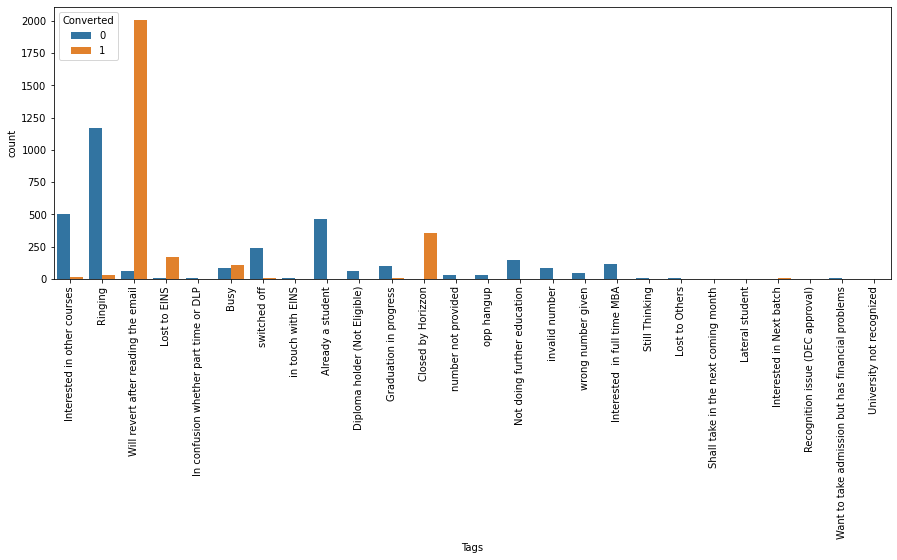

In [ ]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df_clean.Tags, hue=df_clean.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

plt.show()

Dentro da coluna *tag* temos 26 categorias diferentes e mais os valores ausentes, vamos algumas podem ser agrupadas por exemplo: *In confusion whether part time or DLP*, *in touch with EINS*,*Diploma holder (Not Eligible)* seram renomeadas para **Other_Tags** e as ausentes **Not Specified**.

In [ ]:
df_clean['Tags'] = df_clean['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS',
                                             'Diploma holder (Not Eligible)','Approached upfront','Graduation in progress',
                                             'number not provided', 'opp hangup','Still Thinking', 'Lost to Others',
                                             'Shall take in the next coming month','Lateral student','Interested in Next batch',
                                             'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                             'University not recognized', 'switched off','Already a student','Not doing further education',
                                             'invalid number','wrong number given','Interested  in full time MBA'], 'Other_Tags')


In [ ]:
df_clean['Tags'].value_counts(dropna=False)

NaN                                    3353
Will revert after reading the email    2072
Other_Tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

Reduzimos a quantidade de categorias de 27 para 7 categorias, os valores ausentes vamos transforma-los para not specified

In [ ]:
df_clean['Tags'] = df_clean['Tags'].replace(np.nan, 'Not specified')

In [ ]:
df_clean['Tags'].value_counts(dropna=False)

Not specified                          3353
Will revert after reading the email    2072
Other_Tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

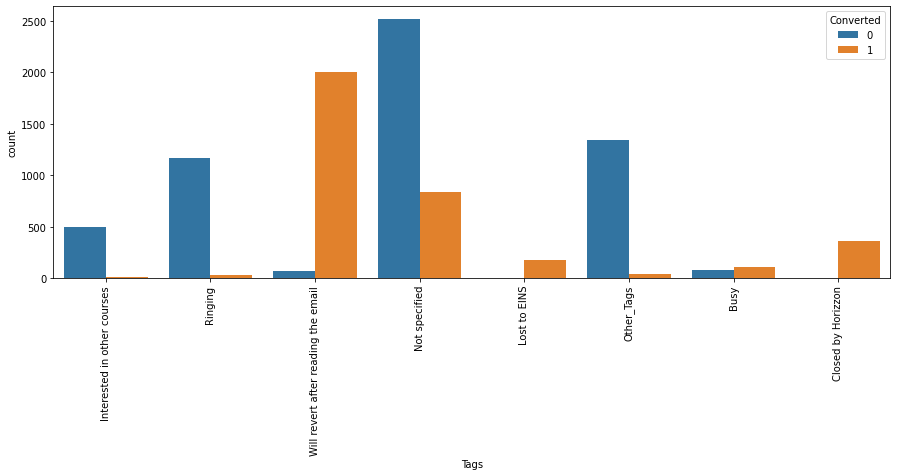

In [ ]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df_clean.Tags, hue=df_clean.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

plt.show()

O mesmo método será usado na seguites colunas:
* Lead Profile                                     
* What matters most to you in choosing a course    
* What is your current occupation                  
* Country                                          
* How did you hear about X Education               
* Specialization                                   
* City                                             
* TotalVisits                                       
* Page Views Per Visit                              
* Last Activity                                     

### Lead Profile

In [ ]:
df_clean['Lead Profile'].value_counts(dropna=False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [ ]:
df_clean['Lead Profile'] = df_clean['Lead Profile'].replace(np.nan, 'Not specified')

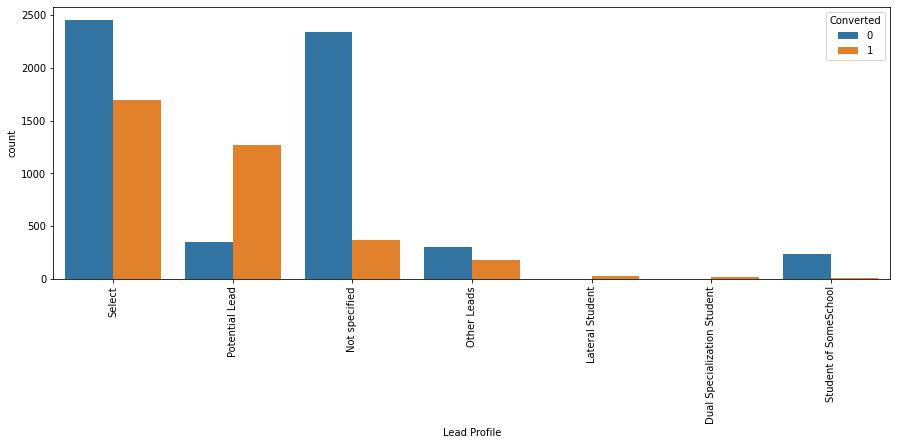

In [ ]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df_clean['Lead Profile'], hue=df_clean.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

plt.show()

### What matters most to you in choosing a course

In [ ]:
df_clean['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [ ]:
df_clean['What matters most to you in choosing a course'] = df_clean['What matters most to you in choosing a course'].replace(np.nan, 'Other')

In [ ]:
df_clean['What matters most to you in choosing a course'] = df_clean['What matters most to you in choosing a course'].replace(['Flexibility & Convenience', 'other'], 'Other')

In [ ]:
df_clean['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects    6528
Other                      2712
Name: What matters most to you in choosing a course, dtype: int64

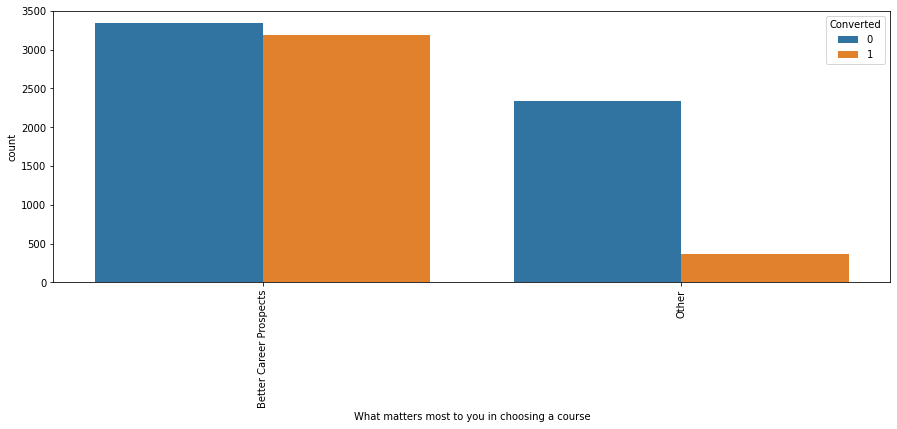

In [ ]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df_clean['What matters most to you in choosing a course'], hue=df_clean.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

plt.show()

### What is your current occupation

In [ ]:
df_clean['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [ ]:
df_clean['What is your current occupation'] = df_clean['What is your current occupation'].replace(np.nan, 'Other')

In [ ]:
df_clean['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

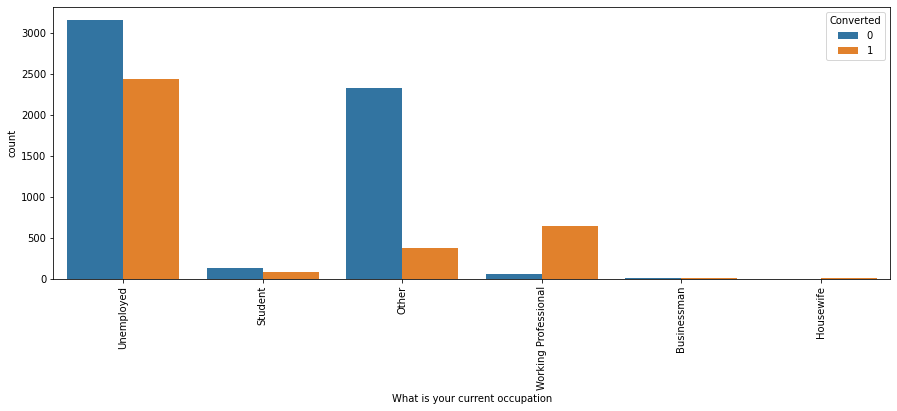

In [ ]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df_clean['What is your current occupation'], hue=df_clean.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

plt.show()

### Country

In [ ]:
df_clean['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

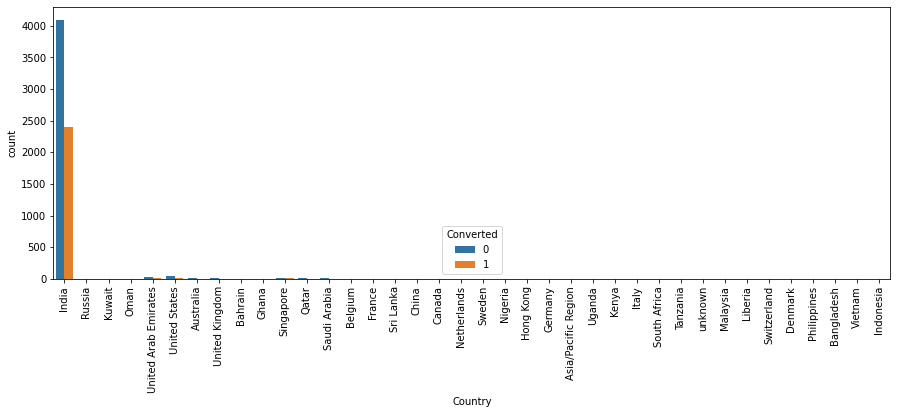

In [ ]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df_clean['Country'], hue=df_clean.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

plt.show()

In [ ]:
df_clean['Country'].value_counts(dropna=False)/ df_clean.shape[0] * 100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

Como podemos observar mais de 70% dos leads são da India, e 26% não foram especificadas. Já na coluna City temos um número menor de dados ausentes cerca de 15%. O dataset representa leads de uma escola nos moldes EAD, com isso e mais ao fato do risco de enviasarmos nosso modelo as colunas country e city seram removidas.

In [ ]:
df_clean.drop(['Country', 'City'], axis=1, inplace=True)

In [ ]:
((df_clean.isnull().sum() / df_clean.shape[0])*100).sort_values(ascending=False)

How did you hear about X Education               23.885281
Specialization                                   15.562771
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Digital Advertisement                             0.000000
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Tags                                              0.000000
Prospect ID                                       0.000000
X Education Forums                                0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
Lead Profile                                      0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

### How did you hear about X Education 

In [ ]:
df_clean['How did you hear about X Education'].value_counts(dropna=False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [ ]:
df_clean['How did you hear about X Education'] = df_clean['How did you hear about X Education'].replace(np.nan, 'Other')

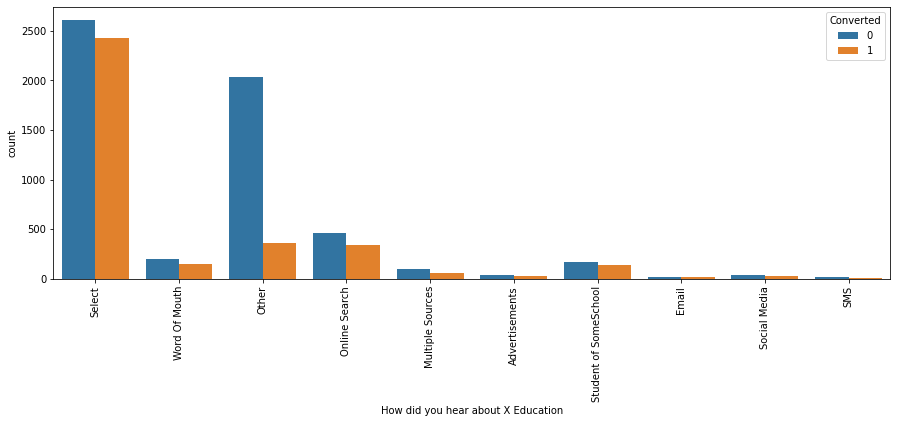

In [ ]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df_clean['How did you hear about X Education'], hue=df_clean.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

plt.show()

### Specialization

In [ ]:
df_clean['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Em Specialization há algumas categorias de Manegement, vamos unir-lá para reduziar o número de categorias.

In [ ]:
df_clean['Specialization'] = df_clean['Specialization'].replace(['Finance Management', 'Human Resource Management',
                                               'Marketing Management', 'Operations Management',
                                              'IT Projects Management','Supply Chain Management',
                                              'Healthcare Management', 'Hospitality Management',
                                              'Retail Management'], 'Management')

In [ ]:
df_clean['Specialization'].value_counts(dropna=False)

Management                           4253
Select                               1942
NaN                                  1438
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [ ]:
df_clean['Specialization'] = df_clean['Specialization'].replace(np.nan, 'Other')

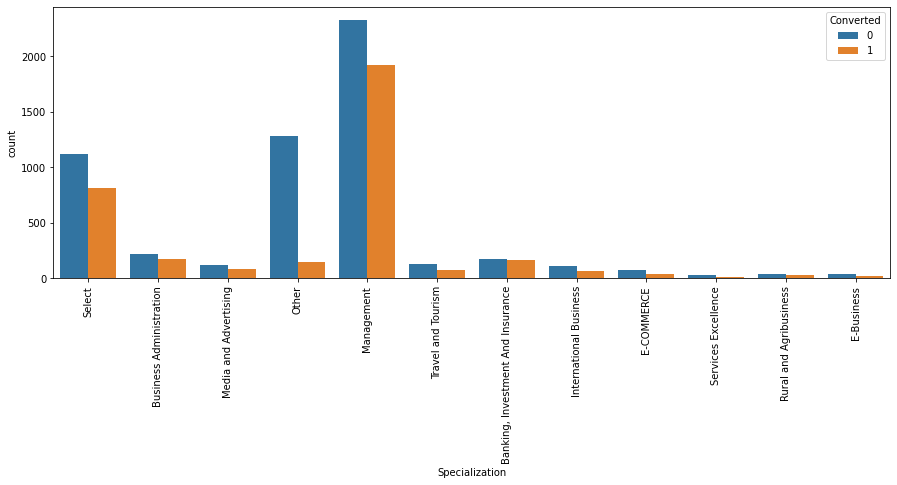

In [ ]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df_clean['Specialization'], hue=df_clean.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

plt.show()

### Page Views Per Visit

In [ ]:
df_clean['Page Views Per Visit'].value_counts(dropna=False)

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: Page Views Per Visit, Length: 115, dtype: int64

In [ ]:
df_clean['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [ ]:
df_clean['Page Views Per Visit'] = df_clean['Page Views Per Visit'].replace(np.nan, 2.161418)

### TotalVisits

In [ ]:
df_clean['TotalVisits'].value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [ ]:
df_clean['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [ ]:
df_clean['TotalVisits'] = df_clean['TotalVisits'].replace(np.nan, 4.854853)

### Last Activity

In [ ]:
df_clean['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [ ]:
df_clean['Last Activity'] = df_clean['Last Activity'].replace(np.nan,'Others')


In [ ]:
df_clean['Last Activity'] = df_clean['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                 'Had a Phone Conversation','Approached upfront',
                                                 'View in browser link Clicked','Email Marked Spam',
                                                 'Email Received','Resubscribed to emails',
                                                 'Visited Booth in Tradeshow'],'Others')

In [ ]:
df_clean['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

### Lead Source

In [ ]:
df_clean['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [ ]:
df_clean['Lead Source'] = df_clean['Lead Source'].replace(np.nan,'Others')

In [ ]:
df_clean['Lead Source'] = df_clean['Lead Source'].replace('google','Google')
df_clean['Lead Source'] = df_clean['Lead Source'].replace('Facebook','Social Media')
df_clean['Lead Source'] = df_clean['Lead Source'].replace(['bing','Click2call',
                                             'Press_Release','youtubechannel',
                                             'welearnblog_Home','WeLearn','blog',
                                             'Pay per Click Ads','testone','NC_EDM'] ,'Others') 

In [ ]:
df_clean['Lead Source'].value_counts(dropna=False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                55
Live Chat              2
Name: Lead Source, dtype: int64

In [ ]:
((df_clean.isnull().sum() / df_clean.shape[0])*100).sort_values(ascending=False)

Prospect ID                                      0.0
Lead Number                                      0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
Lead Profile                                     0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Tags                                             0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
How did you hear about X Education            

Com todos os dados ausentes tratados podemos em fim dar sequência ao projeto. Dada sua baixa relevancia para a analise vamos excluir as colunas 'Prospect ID' e 'Lead Number'.

In [ ]:
df_clean.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [ ]:
df_clean.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,No,No,No,Interested in other courses,No,No,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,No,No,No,Ringing,No,No,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,Will revert after reading the email,No,No,Potential Lead,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Others,Media and Advertising,...,No,No,No,Ringing,No,No,Select,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,No,No,No,Will revert after reading the email,No,No,Select,No,No,Modified


In [ ]:
df_clean.nunique().sort_values(ascending=False)

Total Time Spent on Website                      1731
Page Views Per Visit                              115
TotalVisits                                        42
Last Notable Activity                              16
Specialization                                     12
Lead Source                                        10
How did you hear about X Education                 10
Last Activity                                       9
Tags                                                8
Lead Profile                                        7
What is your current occupation                     6
Lead Origin                                         5
What matters most to you in choosing a course       2
Search                                              2
Converted                                           2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

## Avaliando colunas com apenas um valor

In [ ]:
df_clean['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [ ]:
df_clean['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [ ]:
df_clean['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [ ]:
df_clean['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [ ]:
df_clean['Magazine'].value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

Nas colunas *Receive More Updates About Our Courses*, *Update me on Supply Chain Content*, *Get updates on DM Content*, *I agree to pay the amount through cheque*, *Magazine* todas as entradas são **no**, portanto não influenciaram na decisão, sabendo disso vamos exclui-los também.

In [ ]:
df_clean.drop(['Receive More Updates About Our Courses',
               'Update me on Supply Chain Content',
              'Get updates on DM Content',
              'I agree to pay the amount through cheque',
              'Magazine'], axis=1, inplace=True)

In [ ]:
df_clean.nunique().sort_values(ascending=False)

Total Time Spent on Website                      1731
Page Views Per Visit                              115
TotalVisits                                        42
Last Notable Activity                              16
Specialization                                     12
How did you hear about X Education                 10
Lead Source                                        10
Last Activity                                       9
Tags                                                8
Lead Profile                                        7
What is your current occupation                     6
Lead Origin                                         5
Converted                                           2
What matters most to you in choosing a course       2
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

Neste ponto podemos dizer que nosso dataset foi devidamente tratado, procurando manter o máximo de dados possível, para que possamos reduzir ao máximo enviesar nosso projeto.

### Transformando dados categoricos

Seguindo nosso projeto o proximo passo para construir nosso modelo de machine learning é transformar nossos dados categóricos em numéricos. 

In [ ]:
obj_list = df_clean.select_dtypes(include=['object'])

In [ ]:
obj_list

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Select,No,Modified
1,API,Organic Search,No,No,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Potential Lead,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,Others,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Select,No,Modified
4,Landing Page Submission,Google,No,No,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Select,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,Others,Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Potential Lead,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,SMS Sent,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Other_Tags,Potential Lead,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,SMS Sent,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Other_Tags,Potential Lead,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,SMS Sent,Management,Online Search,Other,Other,No,No,No,No,No,No,Not specified,Not specified,No,SMS Sent


Vamos usar Ordinal Encoder para fazer essa transfomação.

In [ ]:
from category_encoders.ordinal import OrdinalEncoder
enc = OrdinalEncoder(obj_list)
df_ord = enc.fit_transform(df_clean)

In [ ]:
df_ord.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,1,1,1,1,0,0.0,0,0.0,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,2,1,1,0,5.0,674,2.5,2,1,...,1,1,1,1,1,1,2,1,1,2
2,2,3,1,1,1,2.0,1532,2.0,2,2,...,1,1,1,1,1,1,3,2,2,2
3,2,3,1,1,0,1.0,305,1.0,3,3,...,1,1,1,1,1,1,2,1,1,1
4,2,4,1,1,1,2.0,1428,1.0,4,1,...,1,1,1,1,1,1,3,1,1,1


Com nosso dataset pronto vamos separar os dados de treino e teste.

In [ ]:
X = df_ord.drop('Converted', axis=1)
y = df_ord['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Com os dados separados vamos aplicar o método de padronização pois há diferentes escalas entre as features.

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

### Cross Validation


Queremos aqui definir o método que ter melhor desempenho nesse projeto. Sendo assim vamos aplicar a validação cruzada ou cross validation com:
* Random Forest Classifier
* Decision Tree Classifier 
* SGDClassifier
* SVC
* LogisticRegression

In [ ]:
def val_model(X, y, clf, quite=False):
    """
    Realiza cross-validation com os dados de treino para determinado modelo.

    # Arguments
        X: DataFrame, contém as variáveis independetes.
        y: Series, vetor contendo a variável alvo.
        clf: modelo classificador do Scikit-learn.
        quite: bool, indicando se a função deve imprimir os resultados ou não.

    # Returns
        float, média dos scores da cross-validation.
    """
    
    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall')

    if quite == False:
        print("Recall: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
    
    return scores.mean()

In [ ]:
# instanciar modelos
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()


model = []
recall = []
# avaliar o desempenho (recall)
for clf in (rf, dt, sgdc, svc, lr):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_train, y_train, clf, quite=True))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
RandomForestClassifier,0.895701
DecisionTreeClassifier,0.884860
SGDClassifier,0.670654
SVC,0.801869
LogisticRegression,0.695701


Vemos que *Random Forest Classifier* obteve o melhor desempenho dos métodos testado, usaremos ela para fazer a classificação em seguida vamos fazer a previsão e checar as métricas.

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1424
           1       0.94      0.89      0.91       886

    accuracy                           0.93      2310
   macro avg       0.93      0.93      0.93      2310
weighted avg       0.93      0.93      0.93      2310

AUC: 0.9257



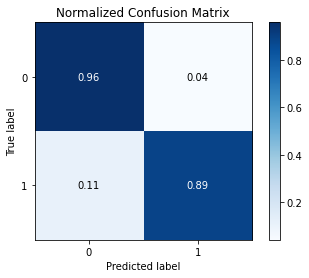

In [ ]:
# modelo final
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# fazer a previsão
X_test = scaler.transform(X_test)
y_pred = rf.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# plotar matriz de confusão
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

A principio obtivemos uma classificação de leads de 89% de chance de prever uma possível conversão em clientes, vamos fazer alguns ajustes de parametros posteriormente para melhorar ainda mais nosso modelo, bem como o apresentar de maneira mais intuitiva. Em breve haverá atualizações 